### Nombre: Diego Armando Vallejo Vinueza

### Caso de Estudio Complexivo: CHURN de empleados de una empresa
### Fecha de Entrega: 23/11/2023

#### Problemática:La empresa XYZ precisa entender las principales razones por las cuales sus empleados se van de la compañía, así como crear un modelo predictivo que permita identificar a los clientes con mayor propensión a irse.

#### Objetivos: 
#### - Identificar outliers
#### - Definir una estrategia de imputación para los outliers y valores faltantes (si lo hubiera)
#### - Realizar un Análisis exploratorio de datos para entender:
#### - Distribución del target
#### - Distribución de las variables en función del target
#### - Correlaciones entre las variables predictoras (para las numéricas)
#### - Crear varios modelos de machine learning para detectar los clientes más propensos a irse de la compañía:
#### - Probar al menos 2 algoritmos y encontrar el mejor en función de analizar las métricas de performance tales como auc, accuracy en entrenamiento y testeo.
#### - Si existira overfitting, qué estrategia seguiría para eliminarlo

### Proceso de Solución Planteada usando el Lenguaje Python:

### 1.- Identificación de Outliers

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga los datos desde el archivo CSV
file_path = 'Employee.csv'
data = pd.read_csv(file_path, delimiter=',', encoding='cp1252')
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [2]:
# Mostrar información detallada sobre el DataFrame inicial, incluyendo el tipo de dato de cada columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [3]:
# Detección de valores nulos
missing_values = data.isnull().sum()
print("Valores Nulos: ")
print(missing_values)

Valores Nulos: 
Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


### 2.- Análisis Exploratorio de Datos

In [4]:
# Revision de estadísticas para cada variable usando la biblioteca open source Sweetviz
# Permite la visualización de graficos e información de las variables en una pagina web
!pip install sweetviz
import sweetviz as sv

my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Revisión de Outliers

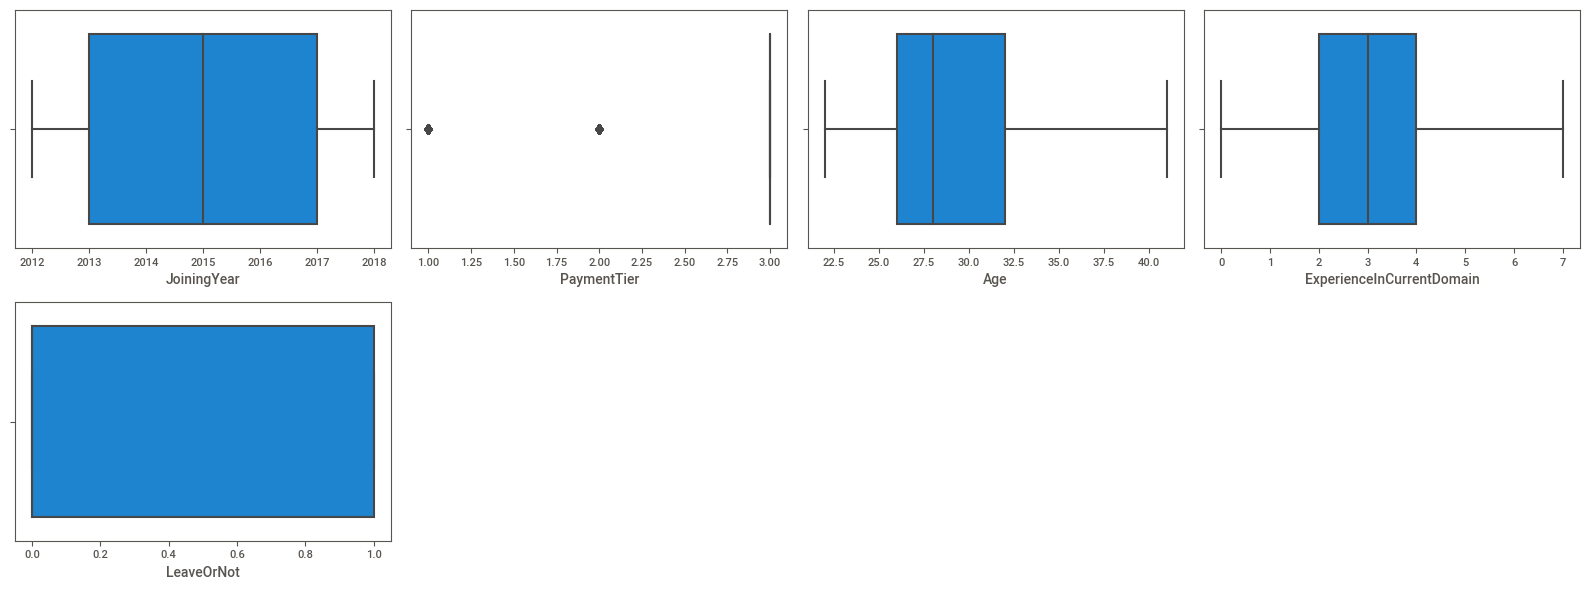

In [8]:
# Selecciona las columnas numéricas para el análisis de outliers
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Configura el tamaño de la figura
plt.figure(figsize=(16, 6))

# Crea un boxplot para cada columna numérica
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=data[column])
    

# Ajusta el diseño
plt.tight_layout()
plt.show()

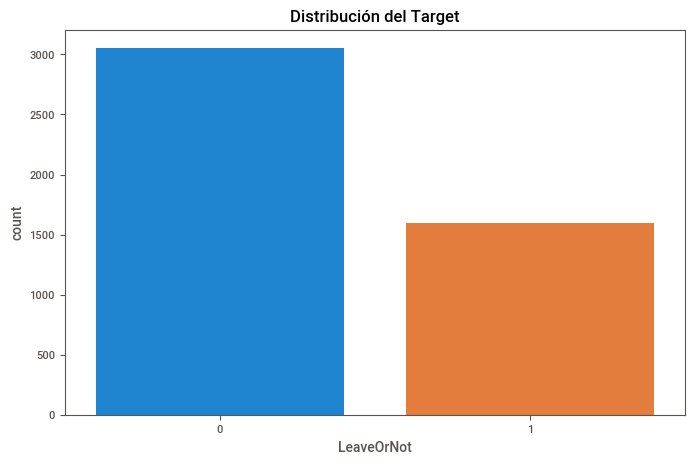

Balance de la categoría (LeaveOrNot):
0    3053
1    1600
Name: LeaveOrNot, dtype: int64


In [9]:
# Distribución del target
plt.figure(figsize=(8, 5))
sns.countplot(x='LeaveOrNot', data=data)
plt.title('Distribución del Target')
plt.show()

# Imprimir el balance de la categoría
leave_count = data['LeaveOrNot'].value_counts()
print("Balance de la categoría (LeaveOrNot):")
print(leave_count)

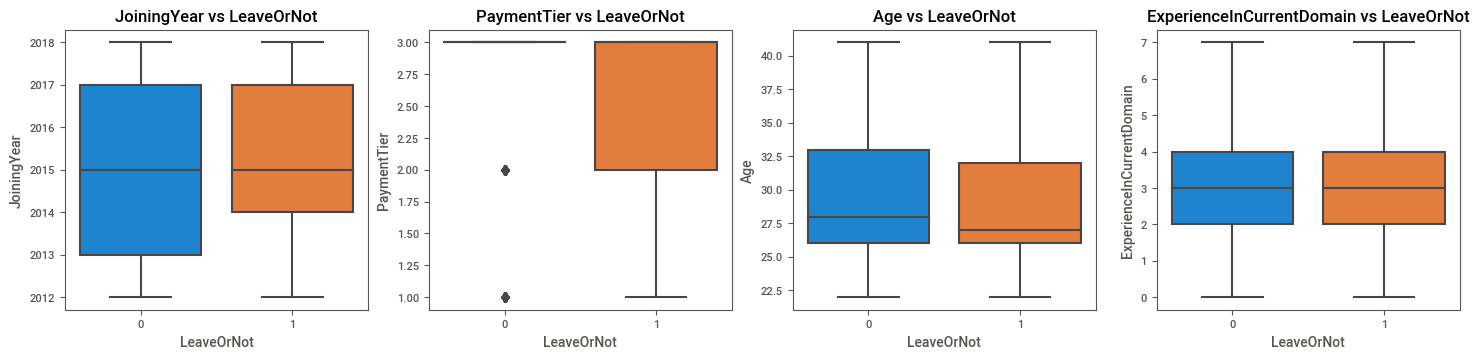

In [10]:
# Distribución de las variables numéricas en función del target
plt.figure(figsize=(18, 8))
for i, column in enumerate(numeric_columns, 1):
    # Omitir la variable LeaveOrNot
    if column != 'LeaveOrNot':
        plt.subplot(2, 4, i)
        sns.boxplot(x='LeaveOrNot', y=data[column], data=data)
        plt.title(f'{column} vs LeaveOrNot')


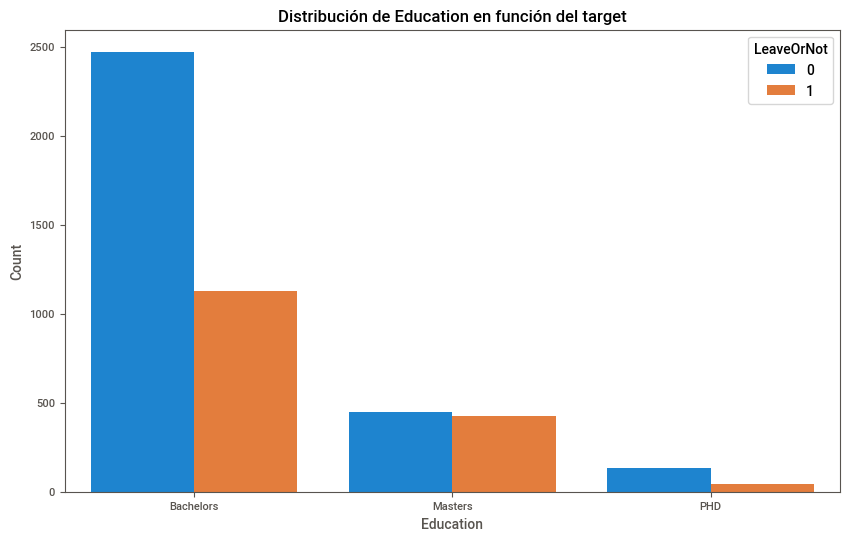

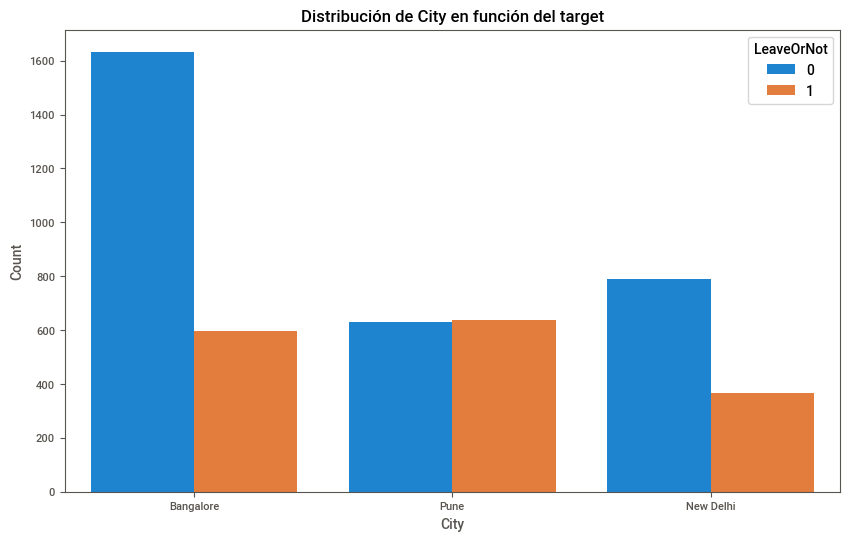

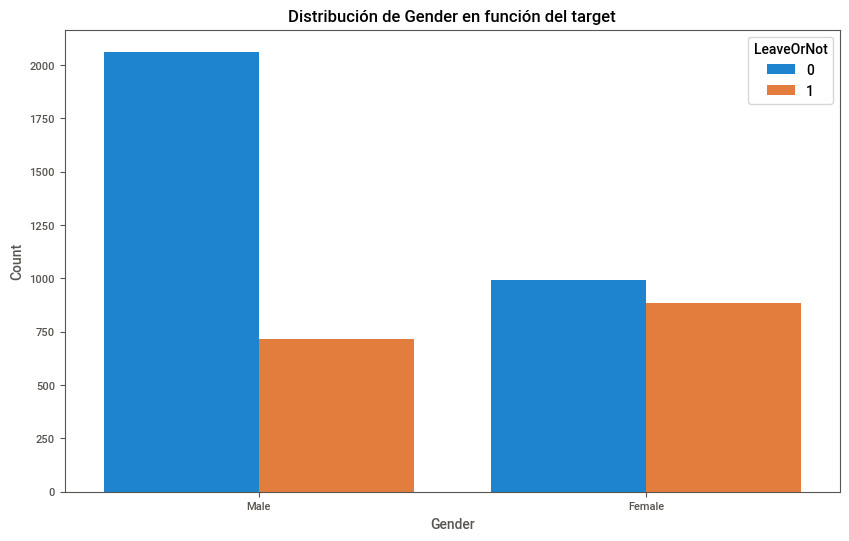

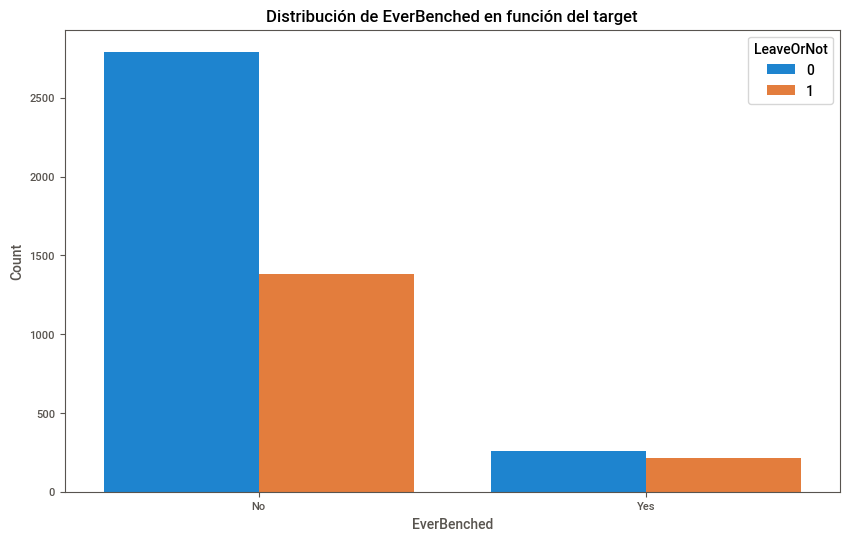

In [11]:
# Distribución de las variables categóricas en función del target
categorical_columns = ['Education', 'City', 'Gender', 'EverBenched', 'LeaveOrNot']
if all(column in data.columns for column in categorical_columns):
    # Crear gráficos de barras para cada variable categórica en función del target
    for column in categorical_columns[:-1]:  # Excluir 'LeaveOrNot'
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue='LeaveOrNot', data=data)
        plt.title(f'Distribución de {column} en función del target')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='LeaveOrNot', loc='upper right')
        plt.show()
else:
    print("Las columnas necesarias no están presentes en el dataframe.")

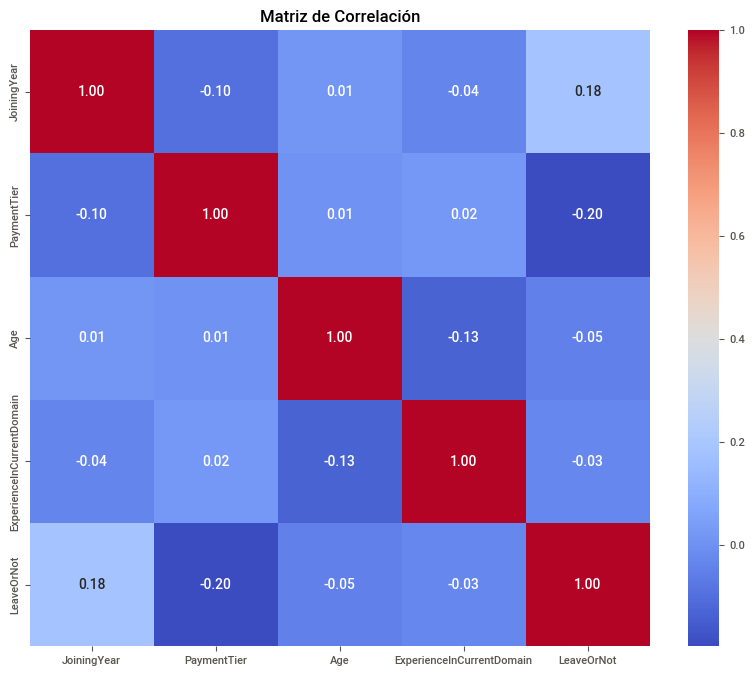

In [12]:
# Gr+afico de Correlaciones entre las variables numéricas
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [13]:
# Valores de Correlaciones entre las variables numéricas
correlation_matrix = data[numeric_columns].corr()

# Imprimir los valores de las correlaciones
print("Valores de las correlaciones entre variables:")
correlation_matrix

Valores de las correlaciones entre variables:


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.096078,0.013165,-0.036525,0.181705
PaymentTier,-0.096078,1.000000,0.007631,0.018314,-0.197638
Age,0.013165,0.007631,1.000000,-0.134643,-0.051126
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000,-0.030504
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.030504,1.000000


#### Interpretación de correlación entre las variables 

#### JoiningYear vs. LeaveOrNot (0.181705): Hay una correlación positiva moderada (0.18) entre el año de incorporación a la empresa (JoiningYear) y la variable objetivo LeaveOrNot. Esto sugiere que los empleados que se unieron a la empresa en años más recientes podrían tener una mayor propensión a irse.

#### PaymentTier vs. LeaveOrNot (-0.197638): Existe una correlación negativa moderada (-0.20) entre la categoría de pago (PaymentTier) y la variable objetivo LeaveOrNot. Esto podría indicar que los empleados en categorías de pago más altas tienen menos probabilidad de irse.

#### Age vs. LeaveOrNot (-0.051126): La correlación entre la edad (Age) y LeaveOrNot es débil y negativa (-0.05). Esto sugiere que la edad no tiene una influencia significativa en la propensión a irse.

#### ExperienceInCurrentDomain vs. LeaveOrNot (-0.030504): Hay una correlación débil y negativa (-0.03) entre la experiencia en el dominio actual (ExperienceInCurrentDomain) y LeaveOrNot. Esto indica que la experiencia en el dominio actual no parece estar fuertemente relacionada con la decisión de dejar la empresa.

### 3.- Creación de varios modelos de machine learning

In [15]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score

# Carga de datos desde el archivo CSV
file_path = 'Employee.csv'
data = pd.read_csv(file_path, encoding='cp1252')

# Codificación de variables categóricas
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data = pd.get_dummies(data, columns=['Education', 'City', 'EverBenched'], drop_first=True)

# División de datos en conjuntos de entrenamiento y prueba
X = data.drop('LeaveOrNot', axis=1)
y = data['LeaveOrNot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definición de la métrica a optimizar (AUC)
scorer = make_scorer(roc_auc_score)

# Función para obtener la cuadrícula de parámetros específica para cada modelo
def get_param_grid(model_name):
    if model_name == 'Random Forest':
        return {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    elif model_name == 'SVM':
        return {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    elif model_name == 'Logistic Regression':
        return {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2']
        }
    elif model_name == 'Gradient Boosting':
        return {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 4, 5]
        }
    else:
        return {}

# Modelos a probar
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(probability=True, random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

# Diccionario para almacenar los mejores modelos y sus hiperparámetros
best_models = {}

# Búsqueda de hiperparámetros y evaluación de modelos
for model_name, model in models:
    # Configuración de hiperparámetros para búsqueda
    param_grid = get_param_grid(model_name)
    
    # Búsqueda de hiperparámetros mediante validación cruzada usando GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Mejores hiperparámetros encontrados
    best_params = grid_search.best_params_
    
    # Evaluación del modelo con los mejores hiperparámetros en el conjunto de prueba
    best_model = grid_search.best_estimator_
    test_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
    
    # Almacena el mejor modelo y sus resultados
    best_models[model_name] = {'best_model': best_model, 'best_params': best_params, 'test_auc': test_auc}

# Imprimir resultados
for model_name, results in best_models.items():
    print(f"\n{model_name}:")
    print("Mejores hiperparámetros encontrados:", results['best_params'])
    print("AUC en conjunto de prueba con mejores hiperparámetros:", results['test_auc'])



Random Forest:
Mejores hiperparámetros encontrados: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
AUC en conjunto de prueba con mejores hiperparámetros: 0.9036157499616975

SVM:
Mejores hiperparámetros encontrados: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
AUC en conjunto de prueba con mejores hiperparámetros: 0.8483708697206476

Logistic Regression:
Mejores hiperparámetros encontrados: {'C': 10, 'penalty': 'l2'}
AUC en conjunto de prueba con mejores hiperparámetros: 0.7215361830345743

Gradient Boosting:
Mejores hiperparámetros encontrados: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
AUC en conjunto de prueba con mejores hiperparámetros: 0.8975154486492007


### Grafico de curva ROC para los modelos generados

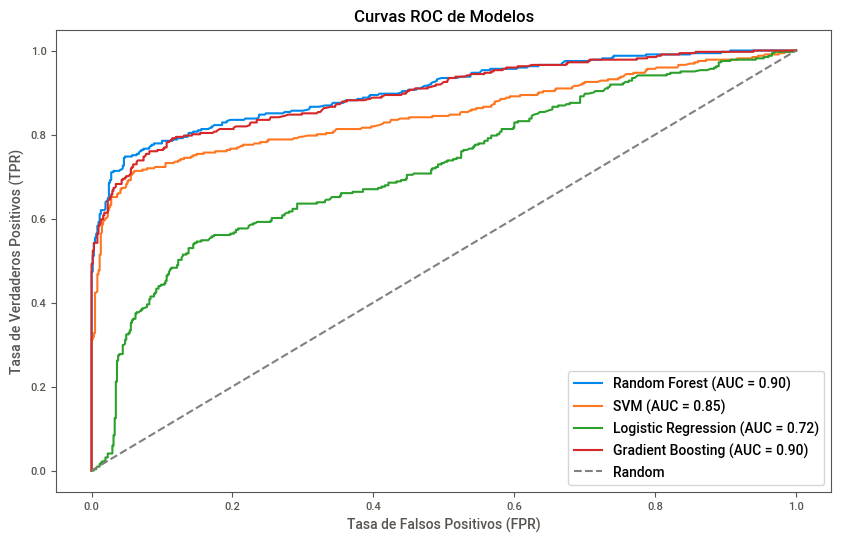

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Gráfico de curvas ROC para cada modelo
plt.figure(figsize=(10, 6))

for model_name, results in best_models.items():
    fpr, tpr, _ = roc_curve(y_test, results['best_model'].predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC de Modelos')
plt.legend(loc='lower right')
plt.show()


### Comparación de los modelos generados

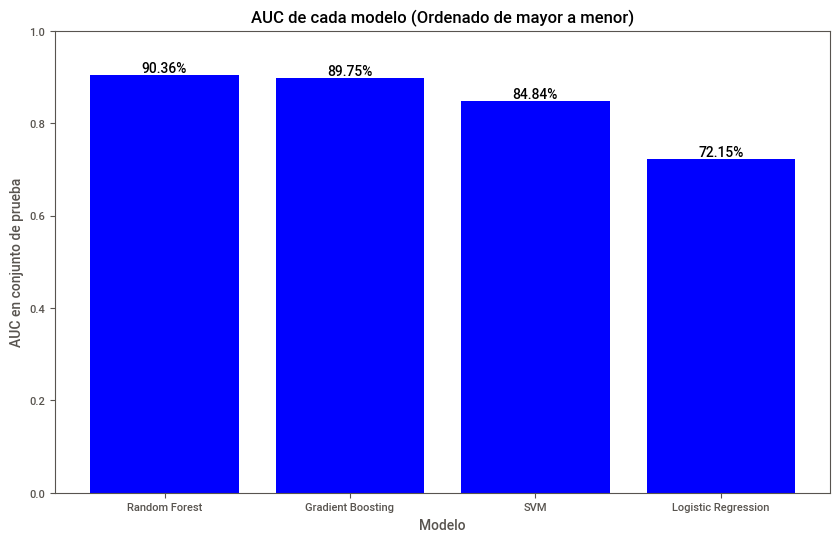

In [17]:
import matplotlib.pyplot as plt

# Listas para almacenar los nombres de los modelos y sus respectivas AUC
model_names = []
auc_scores = []

# Evaluación de AUC y almacenamiento de resultados
for model_name, results in best_models.items():
    model_names.append(model_name)
    auc_scores.append(results['test_auc'])

# Ordenar las barras de mayor a menor AUC
sorted_indices = sorted(range(len(auc_scores)), key=lambda k: auc_scores[k], reverse=True)
model_names = [model_names[i] for i in sorted_indices]
auc_scores = [auc_scores[i] for i in sorted_indices]

# Gráfico de barras para visualizar las AUC de cada modelo
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, auc_scores, color=['blue', 'blue', 'blue', 'blue'])
plt.xlabel('Modelo')
plt.ylabel('AUC en conjunto de prueba')
plt.title('AUC de cada modelo (Ordenado de mayor a menor)')
plt.ylim(0, 1)  # Establecer el rango del eje y entre 0 y 1 (AUC está en este rango)

# Agregar etiquetas con el valor de AUC en porcentaje en la cima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2%}', ha='center', va='bottom')

plt.show()


### Matriz de confusión e importancia de las variables según el mejor modelo

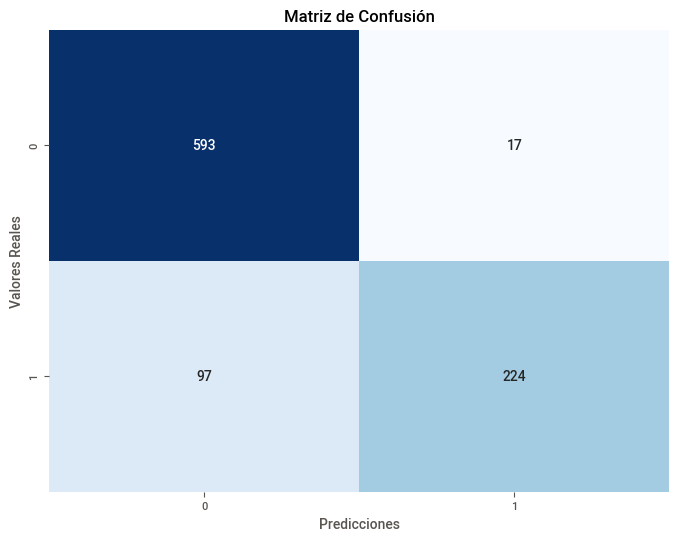

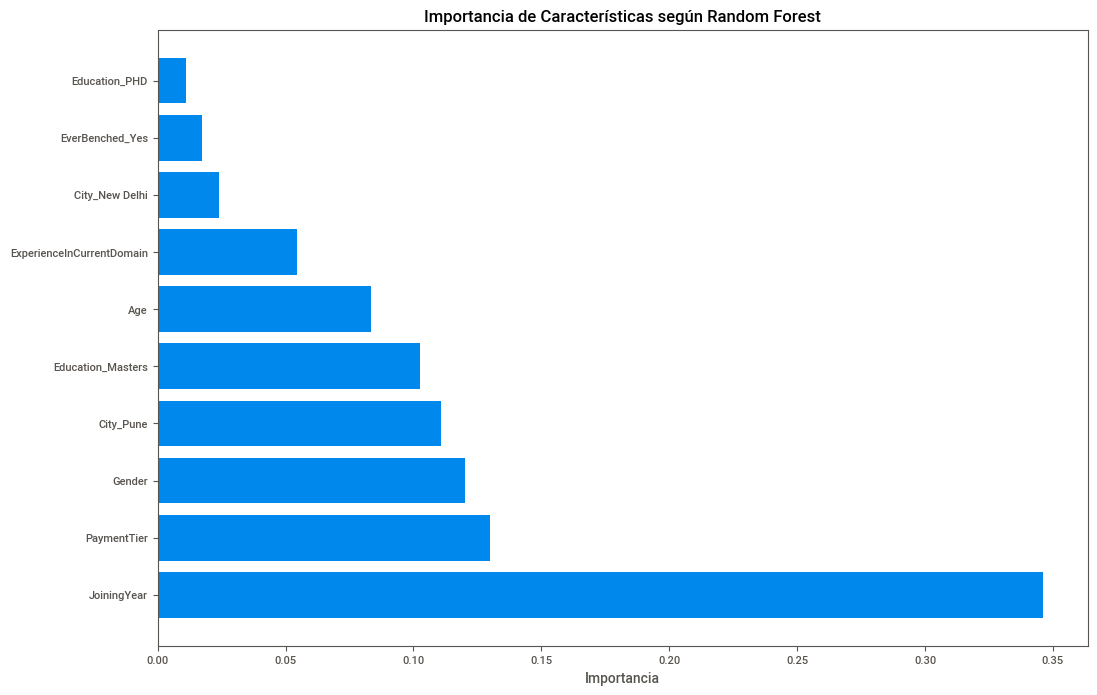


Random Forest:
Mejores hiperparámetros encontrados: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
AUC en conjunto de prueba con mejores hiperparámetros: 0.9036157499616975

Importancia de las variables:
                     Feature  Importance
0                JoiningYear    0.346292
1                PaymentTier    0.129921
3                     Gender    0.120301
8                  City_Pune    0.110902
5          Education_Masters    0.102568
2                        Age    0.083211
4  ExperienceInCurrentDomain    0.054280
7             City_New Delhi    0.024139
9            EverBenched_Yes    0.017247
6              Education_PHD    0.011138

DataFrame con Predicciones y Variables Más Importantes:


,LeaveOrNot,Probability_of_Leaving,JoiningYear,PaymentTier,Gender,City_Pune,Education_Masters
0,0,0.107804,2017,3,0,0,0
1,1,1.000000,2013,1,1,1,0
2,0,0.141808,2014,3,1,0,0
3,1,0.547343,2016,3,0,0,1
4,1,0.667963,2017,3,0,1,1
...,...,...,...,...,...,...,...
4648,0,0.197657,2013,3,1,0,0
4649,1,0.974133,2013,2,0,1,1
4650,1,1.000000,2018,3,0,0,1
4651,0,0.134404,2012,3,0,0,0


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Carga los datos desde el archivo CSV
file_path = 'Employee.csv'
data = pd.read_csv(file_path, encoding='cp1252')

# Codificación de variables categóricas
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data = pd.get_dummies(data, columns=['Education', 'City', 'EverBenched'], drop_first=True)

# División de datos en conjuntos de entrenamiento y prueba
X = data.drop('LeaveOrNot', axis=1)
y = data['LeaveOrNot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mejores hiperparámetros encontrados
best_params = {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

# Crear el modelo Random Forest con los mejores hiperparámetros
best_rf_model = RandomForestClassifier(random_state=42, **best_params)

# Entrenar el modelo en el conjunto de entrenamiento
best_rf_model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
test_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

# Realizar predicciones en el conjunto de prueba
predicciones = best_rf_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predicciones)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

# Visualizar la importancia de las características según Random Forest
feature_importances = best_rf_model.feature_importances_
feature_names = X.columns

# Crear un DataFrame con la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importancia')
plt.title('Importancia de Características según Random Forest')
plt.show()

# Imprimir resultados
print("\nRandom Forest:")
print("Mejores hiperparámetros encontrados:", best_params)
print("AUC en conjunto de prueba con mejores hiperparámetros:", test_auc)

# Imprimir la importancia de las variables
print("\nImportancia de las variables:")
print(feature_importance_df)

# Seleccionar las N variables más importantes (ajusta N según tus necesidades)
top_n_variables = 5
top_variables = feature_importance_df.head(top_n_variables)['Feature'].tolist()

# Crear un subconjunto de datos solo con las variables más importantes
X_top = X[top_variables]

# Entrenar el modelo solo con las variables más importantes
best_rf_model.fit(X_top, y)

# Realizar predicciones en el conjunto de prueba
predictions = best_rf_model.predict_proba(X_top)[:, 1]

# Agregar las predicciones al DataFrame original
data['Probability_of_Leaving'] = predictions

# Visualizar el DataFrame con las predicciones y las variables más importantes
print("\nDataFrame con Predicciones y Variables Más Importantes:")
data[['LeaveOrNot', 'Probability_of_Leaving'] + top_variables]

### Interpretación de la importancia de las variables en la predicción:

##### JoiningYear (Año de Ingreso): Es la variable más importante, con una importancia de aproximadamente el 34.6%. Esto sugiere que el año en que un empleado se unió a la empresa tiene una fuerte influencia en la predicción de si dejará o no la empresa.

##### PaymentTier (Nivel de Pago): Es la segunda variable más importante, con alrededor del 13%. Indica que el nivel de pago también contribuye significativamente a la predicción.

##### Gender (Género): La variable de género contribuye con aproximadamente el 12% a la predicción. Puede sugerir que hay diferencias en la propensión a dejar la empresa entre géneros.

##### City_Pune (Ciudad Pune): La ciudad de Pune tiene una importancia del 11.1%. Esto implica que la ubicación geográfica puede ser un factor importante.

##### Education_Masters (Educación: Maestría): Indica que tener una maestría tiene una importancia del 10.3% en la predicción.

### Metricas del mejor modelo:

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo Random Forest con los mejores hiperparámetros
best_rf_model = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)

# Entrenar el modelo con los datos de entrenamiento
best_rf_model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de entrenamiento
train_auc = roc_auc_score(y_train, best_rf_model.predict_proba(X_train)[:, 1])
train_accuracy = accuracy_score(y_train, best_rf_model.predict(X_train))

# Imprimir resultados en entrenamiento
print("\nRandom Forest (Entrenamiento):")
print("AUC en conjunto de entrenamiento con mejores hiperparámetros:", train_auc)
print("Accuracy en conjunto de entrenamiento con mejores hiperparámetros:", train_accuracy)

# Evaluar el modelo en el conjunto de prueba
test_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
test_accuracy = accuracy_score(y_test, best_rf_model.predict(X_test))

# Imprimir resultados en prueba
print("\nRandom Forest (Prueba):")
print("AUC en conjunto de prueba con mejores hiperparámetros:", test_auc)
print("Accuracy en conjunto de prueba con mejores hiperparámetros:", test_accuracy)



Random Forest (Entrenamiento):
AUC en conjunto de entrenamiento con mejores hiperparámetros: 0.9312266509889116
Accuracy en conjunto de entrenamiento con mejores hiperparámetros: 0.8839333691563676

Random Forest (Prueba):
AUC en conjunto de prueba con mejores hiperparámetros: 0.9036157499616975
Accuracy en conjunto de prueba con mejores hiperparámetros: 0.8775510204081632


### Revisión Curva de Aprendizaje:

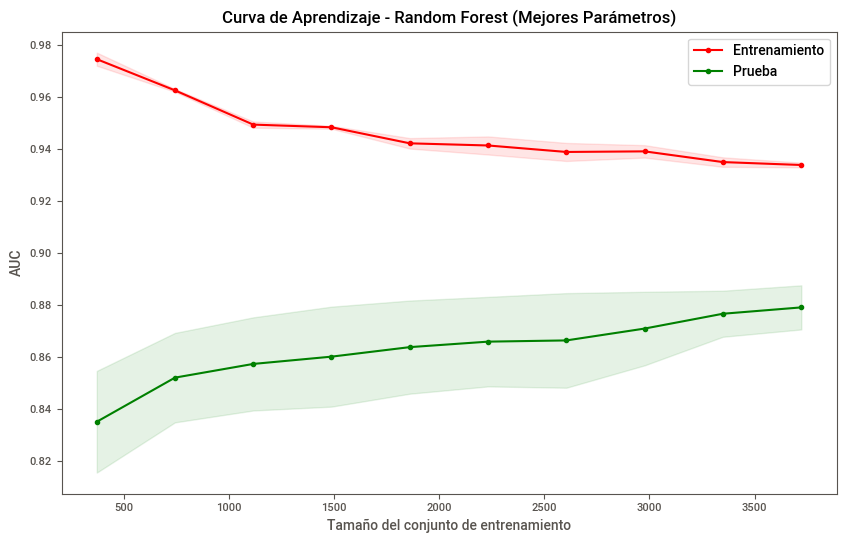

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Definir el modelo Random Forest con los mejores hiperparámetros
best_rf_model = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)

# Gráfico de la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X, y, cv=5, scoring='roc_auc', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcula las medias y desviaciones estándar de las puntuaciones de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Prueba")
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('AUC')
plt.legend(loc="best")
plt.title('Curva de Aprendizaje - Random Forest (Mejores Parámetros)')
plt.show()


### Revisión de Curva de Validación para la Profundidad Máxima:

Profundidad Máxima: 1, AUC (Entrenamiento): 0.7960, AUC (Prueba): 0.7954
Profundidad Máxima: 2, AUC (Entrenamiento): 0.8256, AUC (Prueba): 0.8230
Profundidad Máxima: 3, AUC (Entrenamiento): 0.8425, AUC (Prueba): 0.8390
Profundidad Máxima: 4, AUC (Entrenamiento): 0.8561, AUC (Prueba): 0.8486
Profundidad Máxima: 5, AUC (Entrenamiento): 0.8746, AUC (Prueba): 0.8642
Profundidad Máxima: 6, AUC (Entrenamiento): 0.8866, AUC (Prueba): 0.8693
Profundidad Máxima: 7, AUC (Entrenamiento): 0.8981, AUC (Prueba): 0.8754
Profundidad Máxima: 8, AUC (Entrenamiento): 0.9093, AUC (Prueba): 0.8773
Profundidad Máxima: 9, AUC (Entrenamiento): 0.9218, AUC (Prueba): 0.8788
Profundidad Máxima: 10, AUC (Entrenamiento): 0.9338, AUC (Prueba): 0.8790
Profundidad Máxima: 11, AUC (Entrenamiento): 0.9444, AUC (Prueba): 0.8769
Profundidad Máxima: 12, AUC (Entrenamiento): 0.9525, AUC (Prueba): 0.8744
Profundidad Máxima: 13, AUC (Entrenamiento): 0.9584, AUC (Prueba): 0.8722
Profundidad Máxima: 14, AUC (Entrenamiento): 0.

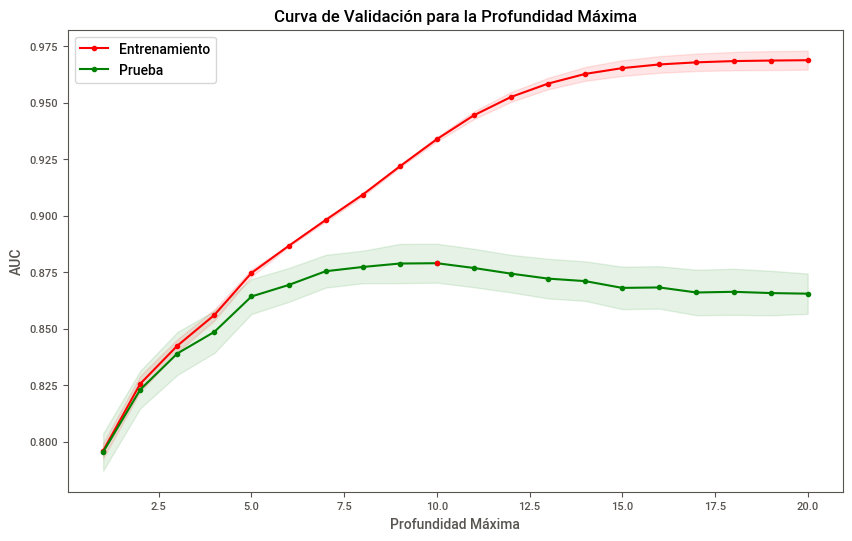

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier

# Modelo de Bosque Aleatorio con los mejores parámetros
best_params = {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
model = RandomForestClassifier(**best_params, random_state=42)

# Valores de profundidad máxima a probar
param_range = np.arange(1, 21)

# Curva de validación para la profundidad máxima
train_scores, test_scores = validation_curve(
    model, X, y, param_name="max_depth", param_range=param_range,
    cv=5, scoring="roc_auc", n_jobs=-1
)

# Imprimir valores numéricos
for depth, train_score, test_score in zip(param_range, train_scores.mean(axis=1), test_scores.mean(axis=1)):
    print(f"Profundidad Máxima: {depth}, AUC (Entrenamiento): {train_score:.4f}, AUC (Prueba): {test_score:.4f}")

# Encuentra la profundidad máxima que maximiza el AUC de prueba
best_depth_index = np.argmax(test_scores.mean(axis=1))
best_depth = param_range[best_depth_index]
best_test_auc = test_scores.mean(axis=1)[best_depth_index]

print(f"La profundidad óptima es: {best_depth} con AUC de prueba: {best_test_auc:.4f}")

# Graficar la curva de validación
plt.figure(figsize=(10, 6))
plt.fill_between(param_range, train_scores.mean(axis=1) - train_scores.std(axis=1),
                 train_scores.mean(axis=1) + train_scores.std(axis=1), alpha=0.1, color="r")
plt.fill_between(param_range, test_scores.mean(axis=1) - test_scores.std(axis=1),
                 test_scores.mean(axis=1) + test_scores.std(axis=1), alpha=0.1, color="g")
plt.plot(param_range, train_scores.mean(axis=1), 'o-', color="r", label="Entrenamiento")
plt.plot(param_range, test_scores.mean(axis=1), 'o-', color="g", label="Prueba")
plt.plot(best_depth, best_test_auc, 'ro')  # Marcar el punto óptimo
plt.xlabel('Profundidad Máxima')
plt.ylabel('AUC')
plt.legend(loc="best")
plt.title('Curva de Validación para la Profundidad Máxima')
plt.show()

### Conclusiones del Estudio Realizado: 

#### 1.- La varaible JoiningYear (Año de Ingreso): Es la variable más importante, con una importancia de aproximadamente el 34.6%. Esto sugiere que el año en que un empleado se unió a la empresa tiene una fuerte influencia en la predicción de si dejará o no la empresa.
#### 2.- Se considera que el mejor modelo es el de Random Forest
#### 3.- Los mejores parámetros para el modelo de Random Forest son: 
#####          Profundidad Máxima (max_depth): 10
#####          Mínimo de Muestras en Hojas (min_samples_leaf): 1
#####          Mínimo de Muestras para Dividir (min_samples_split): 5
#####          Número de Estimadores (n_estimators): 200
#### 4.- El modelo alcanza un buen equilibrio entre sesgo y varianza alrededor de la profundidad máxima de 10, donde el rendimiento en el conjunto de prueba es óptimo con un valor de AUC de prueba: 0.8790. Se recomendaría seleccionar este valor de profundidad máxima para el modelo final.